In [1]:
import sklearn
import numpy as np

In [2]:
import scipy.io
mnist = scipy.io.loadmat('mnist-original.mat')

In [3]:
X = mnist["data"].T
y = mnist["label"].T
y.shape

(70000, 1)

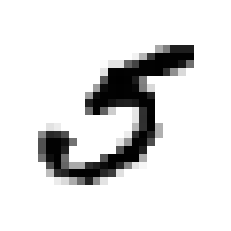

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [5]:
y[25001]

array([4.])

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, np.ravel(y_train_5,order='C'))

sgd_clf.predict([some_digit])

array([False])

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, np.ravel(y_train_5,order='C'), cv = 3, scoring = "accuracy")

array([0.89345, 0.75235, 0.7899 ])

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0.90965 0.90965 0.90965 ... 0.09035 0.90965 0.09035]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0.90965 0.90965 0.90965 ... 0.90965 0.09035 0.90965]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0.09035 0.90965 0.09035 ... 0.90965 0.90965 0.09035]


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, np.ravel(y_train_5,order='C'), cv=3, scoring="accuracy")

array([0.89345, 0.75235, 0.7899 ])

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [12]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([1.     , 0.72895, 1.     ])

In [29]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, np.ravel(y_train_5,order='C'), cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(np.ravel(y_train_5,order='C'), np.ravel(y_train_pred, order='C'))

array([[44363, 10216],
       [ 1070,  4351]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_pred)
recall_score(y_train_5, y_train_pred)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 20000]

In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 20000]

In [17]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:946: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:985: RuntimeWarning: Number of classes in training fold (2) does not match total number of classes (1). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '


IndexError: index 1 is out of bounds for axis 1 with size 1